# SIMPLE PENDULUM
A simple pendlum is made from a small ball called a bob suspended by a long thread from a rigid support. In this discussion we will assume the thread is completely rigid i.e. cannot be stretched, contracted or broken.

## Define the system
We have a pendulum:

- A point mass m at the end of a massless rigid rod,

- Subject to gravity and a damping force (e.g., air resistance),

- It swings in a vertical plane (2D rotation).

To find and visualize the change in position over time, we require the velocity and in turn the acceleartion in the angular domain

$$\qquad \ddot{\theta} \quad \rightarrow \quad \dot{\theta} \quad \rightarrow \quad \theta $$

We can get acceleration from Newton's second law of motion

$$ F_{net} = ma = mL\ddot{\theta} $$

$$F = -F_g sin(\theta) $$

where:

- m : Mass (Kg)
- a : Linear acceleration (m/$x^2$)
- L : Length of massless rigid rod (m)

## Forces acting on the bob
At any angle $\theta$, the tangential component of gravity is acting on the bob

<div style="display: flex; align-items: center;">

  <img src="Resources\pendulum.png" alt="Pendulum image with angles" style="margin-right: 20px;"/>

  From the image we can deduce<br> $\qquad F = -F_g sin(\theta)$ <br> $\qquad F = -mg sin(\theta)$ <br> (negative because it acts to restore the pendulum to equilibrium)

</div>

We also have damping, a force proportional to velocity (opposing motion):

$$F_{damping} = -bV = -bL\dot{\theta}$$

where:

- b : damping coefficient (Kg/s)
- V : tangential velocity of bob

$\therefore$

$$ F_{net} = mL\ddot{\theta} = -mg sin(\theta) -bL\dot{\theta}$$

$\therefore$

$$ \ddot{\theta} = -\frac{g}{L}sin(\theta) -\frac{b}{m}\dot{\theta}$$

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

# matplotlib imports
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

In [2]:
#assign constants (g, len)
g = 9.81        # Gravity (m/s^2)
l = 10.0        # Length of the pendulum (m)
b_m = 0.05      # damping coefficient (Kg/s) Over mass
dt = 0.02       # Time step (s) 50 fps
sim_time = 10   # Total simulation time (s)
threshold = 0.01# smallest angle allowable in simulation

# initial conditions : theta = 30, angular velocity/omega = 0
theta = np.deg2rad(30)
theta_d = 0
theta_vals = []
while True:
    theta_d_d = -((g/l)*np.sin(theta)) - (b_m * theta_d)    #angular acceleration equation
    theta_d += theta_d_d * dt
    theta += theta_d * dt
    theta_vals.append(theta)
    if abs(theta) < threshold and abs(theta_d) < 1e-3:
        break

print(len(theta_vals))

7942


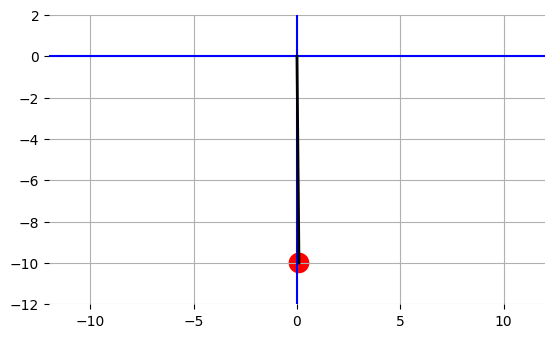

In [3]:
#plot setup
fig,ax = plt.subplots()
ax.set_xlim(-l *1.2, l * 1.2)
ax.set_ylim(-l *1.2, l *0.2)
ax.set_aspect('equal')
ax.grid(True)
ax.axhline(0, color='blue')  # y=0 axis (horizontal)
ax.axvline(0, color='blue')  # x=0 axis (vertical)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

origin_pos = (0,0)
bob_radius = l/20
line, = ax.plot([],[],'k-',lw=2)
bob = plt.Circle((0, 0), bob_radius, fc='red')
ax.add_patch(bob)

# --- Animation function ---
def animate(i):
    theta = theta_vals[i]
    x = l * np.sin(theta)
    y = -l * np.cos(theta)
    line.set_data([origin_pos[0], x], [origin_pos[1], y])
    bob.set_center((x, y))
    return line, bob

# --- Create animation ---
ani = animation.FuncAnimation(fig, animate, frames=len(theta_vals), interval=dt*1000, blit=True)

# --- Save to MP4 ---
ffmpeg_writer = animation.FFMpegWriter(fps=int(1/dt))
ani.save('damped_pendulum_threshold.mp4', writer=ffmpeg_writer)
plt.show()

# OUTPUT
Upon successfully running the cells you will get the output below:

<video width="480" height="320" controls>
  <source src="Resources\damped_pendulum_threshold.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>

you can find the video output in the resources folder.

## Troubleshooting
On Windows, if you see a FileNotFoundError: [WinError 2] The system cannot find the file specified after trying to save a .mp4 file, you may not have ffmpeg installed. To check if ffmpeg is installed and added to your PATH variable correctly, open a command prompt window and run the command ffmpeg. If you see a message showing the version of ffmpeg installed, then you have ffmpeg installed properly already. If ffmpeg is not installed, install it by doing the following:

- Go to the official FFmpeg website.
- Click Windows > then go to the “Windows builds by Gyan.dev” link.
- On that site, click on the “essentials” zip under “Release builds”.
- Extract the zipped folder to your Downloads folder.
- Cut and paste the extracted folder to C:\Users\Programs.
- In the extracted folder you just pasted, navigate until your find the bin folder. Right click on the bin folder and copy its path.
- Press the windows key and type Edit the System Variables.
- Click Environmental Variables, then under the System Variables tab, select Path and then click the Edit button.
- Click New and paste in the path to the bin folder you copied in step 4.
- Press OK until the window closes.
- Open a new command window and run the command ffmpeg. If you see a message showing the version of ffmpeg, then you have ffmpeg configured properly.
- Close and re-open visual studio. Run the program again, and the .mp4 file should be created successfully.